In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def plot_scatter(W_, xy, labels):
    for k, color in [(0, 'b'), (1, 'r')]:
        idx = labels.flatten() == k
        plt.scatter(xy[idx, 0], xy[idx, 1], c=color)

    x1 = np.linspace(-.1, 1.1)
    x2 = -W_[1] / W_[2] * x1  - W_[0] / W_[2]
    plt.plot(x1, x2, '--k')

    plt.grid()
    plt.show()

## FeedForward Model
$$\hat{y^{(i)}} = \sigma(x^{(i)}W)$$
1. Feature 정리
1. Linear Model
$$ z = x W =
\begin{bmatrix}
1 & x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2
\end{bmatrix}=w_0 + w_1 x_1 + w_2x_2
$$
1. Sigmoid
$$ \sigma(z)=\frac{1}{1+e^{-z}}$$

### 00. 데이터 만들기

In [3]:
W = np.array([-4./5., 3./4., 1.0])

np.random.seed(327)
xy = np.random.rand(30,2)
labels = np.zeros(len(xy))
labels[W[0] + W[1] * xy[:,0] + W[2] * xy[:,1] > 0] = 1

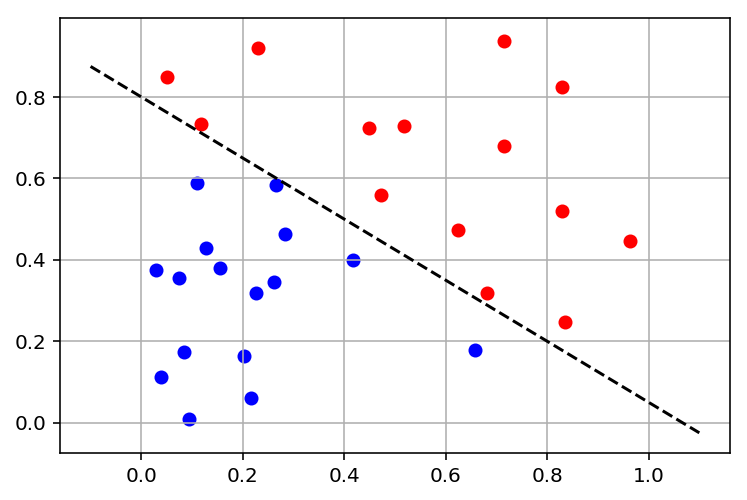

In [4]:
plot_scatter(W, xy, labels)

### 01. Feature 정리

In [5]:
features = np.array([[1.0, xval, yval] for xval, yval in xy])
features[:10]

array([[ 1.        ,  0.44795858,  0.72428867],
       [ 1.        ,  0.28380741,  0.46408744],
       [ 1.        ,  0.71479014,  0.67975137],
       [ 1.        ,  0.02897187,  0.3739039 ],
       [ 1.        ,  0.62358144,  0.4734709 ],
       [ 1.        ,  0.51783612,  0.72832152],
       [ 1.        ,  0.26099338,  0.34596232],
       [ 1.        ,  0.83509598,  0.24632146],
       [ 1.        ,  0.68179324,  0.31754929],
       [ 1.        ,  0.20170095,  0.16371035]])

### 02. Linear Model

In [6]:
W0 = np.array([[-0.5, 0.7, 1.8]]).reshape(-1,1)

In [ ]:
# TODO 1
x = None
W = None

print(x.shape)
print(W.shape)

# TODO 2
linear_model = None

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    out = sess.run(linear_model, feed_dict={x: features})
    print(out.flatten())

### 03. Sigmoid

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

Hint : `tf.sigmoid`

In [ ]:
x = tf.placeholder(tf.float64, shape=(len(features), len(W0)))
W = tf.Variable(W0, dtype=tf.float64)

print(x.shape)
print(W.shape)

# TODO 3
linear_model = None

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    out = sess.run(linear_model, feed_dict={x: features})
    print(out.flatten())

## Loss function
$$loss(y, \hat{y}) = \frac{1}{30}\sum_{i=1}^{30}-y_i\log\hat{y_i}-(1-y_i)\log(1-\hat{y_i})$$

Hint :

1. `tf.reduce_mean`
1. `tf.log`

In [ ]:
x = tf.placeholder(tf.float64, shape=(len(features), len(W0)))
y = tf.placeholder(tf.float64, shape=(len(features), 1))
W = tf.Variable(W0, dtype=tf.float64)

print(x.shape)
print(y.shape)
print(W.shape)

# TODO 4
yhat = None
loss = None

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    out = sess.run(loss, feed_dict={x: features, y: labels.reshape(-1,1)})
    print(out)

## BackPropagation


## Gradient Descent

In [ ]:
x = tf.placeholder(tf.float64, shape=(len(features), len(W0)))
y = tf.placeholder(tf.float64, shape=(len(features), 1))
W = tf.Variable(W0, dtype=tf.float64)

print(x.shape)
print(y.shape)
print(W.shape)

linear_model = tf.sigmoid(tf.matmul(x, W))
loss = tf.reduce_mean(- y * tf.log(linear_model) - (1 - y) * tf.log((1 - linear_model)))

lr = .1
MaxEpochs= 1000
# TODO 5
optimizer = None
train = None

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpochs):
        sess.run(train, feed_dict={x: features, y:labels.reshape(-1,1)})
    
    curr_W, curr_loss = sess.run([W, loss], feed_dict={x: features, y: labels.reshape(-1,1)})
    print(curr_W.flatten(), curr_loss)
W_gd = curr_W.flatten()

In [ ]:
plot_scatter(W0, xy, labels)

In [ ]:
plot_scatter(W_gd, xy, labels)

## Stochastic Gradient Descent

`placeholder`에 들어가는 data size가 달라지는 불편함이 있습니다.

```python
x = tf.placeholder(tf.float64, shape=(len(features), len(W0)))
y = tf.placeholder(tf.float64, shape=(len(features), 1))

```
을 다음과 같이 변경하여야 합니다.
```python
x = tf.placeholder(tf.float64, shape=(batch_size, len(W0)))
y = tf.placeholder(tf.float64, shape=(batch_size, 1))
```

하지만, 이 경우에는
```python
curr_W, curr_loss = sess.run([W, loss], feed_dict={x: features, y: labels.reshape(-1,1)})
```
에서 에러가 발생합니다.

이렇게 데이터 갯수가 변경되는 경우에는 다음 코드가 유용합니다.
```python
x = tf.placeholder(tf.float64, shape=(None, len(W0)))
y = tf.placeholder(tf.float64, shape=(None, 1))
```



In [ ]:
from helper import generate_batches

In [ ]:
# TODO 7
x = None
y = None
W = None

print(x.shape)
print(y.shape)
print(W.shape)

# TODO 8
linear_model = None
loss = None

batch_size = 10
lr = 0.1
MaxEpochs= 1000
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

# TODO 9
idx = np.arange(0, len(features))
None
shuffled_features = None
shuffled_labels = None

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpochs):
        for x_batch, y_batch in generate_batches(batch_size, shuffled_features, shuffled_labels):
            sess.run(train, feed_dict={x: x_batch, y: y_batch.reshape(-1,1)})
    curr_W, curr_loss = sess.run([W, loss], feed_dict={x: features, y: labels.reshape(-1,1)})
    print(curr_W.flatten(), curr_loss)
W_sgd = curr_W.flatten()

In [ ]:
plot_scatter(W0, xy, labels)

In [ ]:
plot_scatter(W_sgd, xy, labels)